In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [4]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [5]:
visitor = pd.read_csv('data/방문객_수_종합.csv',encoding = 'utf-8')

In [6]:
visitor

,년,기초지자체,현지인(a),외지인(b),외국인(c),내국인(a+b),외부방문자(b+c),전체방문자(a+b+c)
0,2018,강릉시,9167249,31244031,418154,40411280,31662185.0,40829434
1,2018,전주시,10495256,37292555,111949,47787810,37404503.5,47899759
2,2018,목포시,9248442,22355071,68942,31603513,22424013.0,31672455
3,2018,부산광역시,77002999,145717600,3910899,222720599,149628499.0,226631499
4,2018,안동시,6835122,18414046,56740,25249168,18470786.0,25305908
5,2019,강릉시,51030368,32137920,161141,83168288,32299061.0,83329429
6,2019,전주시,61336137,36765379,144686,98101516,36910065.0,98246202
7,2019,목포시,54444733,23609856,99406,78054588,23709261.0,78153994
8,2019,부산광역시,472292712,149672134,5284413,621964847,154956548.0,627249260
9,2019,안동시,41153724,18972849,75528,60126574,19048377.0,60202102


In [7]:
piv = visitor.pivot_table('외부방문자(b+c)',index = ['년','기초지자체'], aggfunc = ['sum'] )
piv

sum
             외부방문자(b+c)
년    기초지자체             
2018 강릉시     31662185.0
     목포시     22424013.0
     부산광역시  149628499.0
     안동시     18470786.0
     전주시     37404503.5
2019 강릉시     32299061.0
     목포시     23709261.0
     부산광역시  154956548.0
     안동시     19048377.0
     전주시     36910065.0
2020 강릉시     31244271.0
     목포시     21298301.0
     부산광역시  125665298.0
     안동시     15904027.0
     전주시     31500203.0

In [8]:
# 강릉 3년간 방문자
kangnung = piv.xs('강릉시', level='기초지자체')

In [9]:
#멀티인덱스 초기화
kangnung.reset_index(drop = False, inplace = True)
kangnung

,년,sum
,,외부방문자(b+c)
0,2018,31662185.0
1,2019,32299061.0
2,2020,31244271.0


In [31]:
(kangnung['sum','외부방문자(b+c)'][1]/kangnung['sum','외부방문자(b+c)'][0])*100 -100


2.0114720446488406

In [14]:
kangnung['년']
kangnung['sum','외부방문자(b+c)']

0    2018
1    2019
2    2020
Name: 년, dtype: int64

0    31662185.0
1    32299061.0
2    31244271.0
Name: (sum, 외부방문자(b+c)), dtype: float64

([<matplotlib.axis.XTick at 0x1ba148749d0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

(20000000.0, 33000000.0)

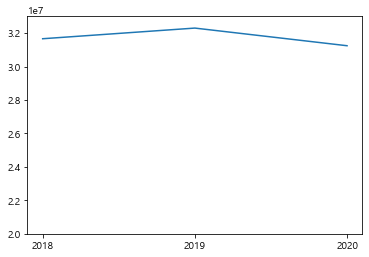

In [32]:
plt.plot(kangnung['년'],kangnung['sum','외부방문자(b+c)'])
plt.xticks(kangnung['년'])
plt.ylim(20000000,33000000)
plt.show()

In [17]:
# 목포 3년간 방문자
mokpo = piv.xs('목포시', level='기초지자체')

In [18]:
#멀티인덱스 초기화
mokpo.reset_index(drop = False, inplace = True)
mokpo

,년,sum
,,외부방문자(b+c)
0,2018,22424013.0
1,2019,23709261.0
2,2020,21298301.0


In [19]:
(mokpo['sum','외부방문자(b+c)'][1]/mokpo['sum','외부방문자(b+c)'][0])*100 -100

5.73156999150865

In [253]:
mokpo['년']
mokpo['sum','외부방문자(b+c)']

0    2018
1    2019
2    2020
Name: 년, dtype: int64

0    22424013.0
1    23709261.0
2    21298301.0
Name: (sum, 외부방문자(b+c)), dtype: float64

([<matplotlib.axis.XTick at 0x1ba147ed820>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

(20000000.0, 33000000.0)

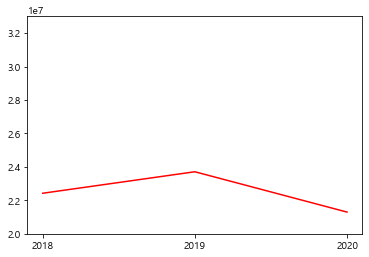

In [33]:
plt.plot(mokpo['년'],mokpo['sum','외부방문자(b+c)'],color='red')
plt.xticks(mokpo['년'])
plt.ylim(20000000,33000000)
plt.show()

In [20]:
# 안동 3년간 방문자
andong = piv.xs('안동시', level='기초지자체')

In [21]:
#멀티인덱스 초기화
andong.reset_index(drop = False, inplace = True)
andong

,년,sum
,,외부방문자(b+c)
0,2018,18470786.0
1,2019,19048377.0
2,2020,15904027.0


In [22]:
(andong['sum','외부방문자(b+c)'][1]/andong['sum','외부방문자(b+c)'][0])*100 -100

3.1270515504862715

In [259]:
andong['년']
andong['sum','외부방문자(b+c)']

0    2018
1    2019
2    2020
Name: 년, dtype: int64

0    18470786.0
1    19048377.0
2    15904027.0
Name: (sum, 외부방문자(b+c)), dtype: float64

([<matplotlib.axis.XTick at 0x1ba148fecd0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

(13000000.0, 33000000.0)

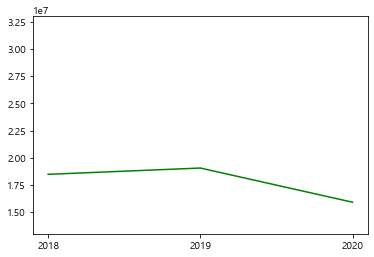

In [34]:
plt.plot(andong['년'],andong['sum','외부방문자(b+c)'],color='green')
plt.xticks(andong['년'])
plt.ylim(13000000,33000000)
plt.show()

In [23]:
# 전주 3년간 방문자
jeonju = piv.xs('전주시', level='기초지자체')

In [24]:
#멀티인덱스 초기화
jeonju.reset_index(drop = False, inplace = True)
jeonju

,년,sum
,,외부방문자(b+c)
0,2018,37404503.5
1,2019,36910065.0
2,2020,31500203.0


In [25]:
(jeonju['sum','외부방문자(b+c)'][1]/jeonju['sum','외부방문자(b+c)'][0])*100 -100

-1.3218689027646064

In [268]:
jeonju['년']
jeonju['sum','외부방문자(b+c)']

0    2018
1    2019
2    2020
Name: 년, dtype: int64

0    37404503.5
1    36910065.0
2    31500203.0
Name: (sum, 외부방문자(b+c)), dtype: float64

([<matplotlib.axis.XTick at 0x1ba149528b0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

(30000000.0, 43000000.0)

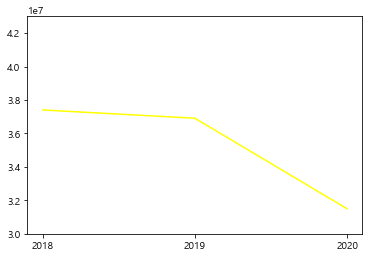

In [35]:
plt.plot(jeonju['년'],jeonju['sum','외부방문자(b+c)'],color='yellow')
plt.xticks(jeonju['년'])
plt.ylim(30000000,43000000)
plt.show()

In [26]:
# 부산 3년간 방문자
busan = piv.xs('부산광역시', level='기초지자체')

In [27]:
#멀티인덱스 초기화
busan.reset_index(drop = False, inplace = True)
busan

,년,sum
,,외부방문자(b+c)
0,2018,149628499.0
1,2019,154956548.0
2,2020,125665298.0


In [28]:
(busan['sum','외부방문자(b+c)'][1]/busan['sum','외부방문자(b+c)'][0])*100 -100

3.56085173319822

In [273]:
busan['년']
busan['sum','외부방문자(b+c)']

0    2018
1    2019
2    2020
Name: 년, dtype: int64

0    149628499.0
1    154956548.0
2    125665298.0
Name: (sum, 외부방문자(b+c)), dtype: float64

([<matplotlib.axis.XTick at 0x1ba149f2fd0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

(20000000.0, 160000000.0)

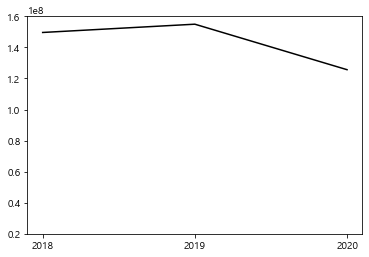

In [37]:
plt.plot(busan['년'],busan['sum','외부방문자(b+c)'],color='black')
plt.xticks(busan['년'])
plt.ylim(20000000,160000000)
plt.show()

([<matplotlib.axis.XTick at 0x1c7c7c6fac0>,
 [Text(2018, 0, '2018'), Text(2019, 0, '2019'), Text(2020, 0, '2020')])

(13000000.0, 170000000.0)

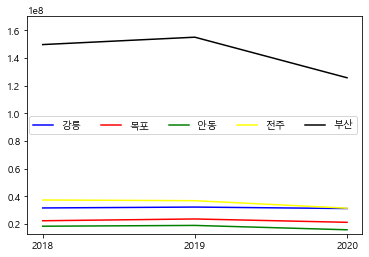

In [284]:
plt.plot(kangnung['년'],kangnung['sum','외부방문자(b+c)'],color = 'blue',label='강릉')
plt.plot(mokpo['년'],mokpo['sum','외부방문자(b+c)'],color='red',label='목포')
plt.plot(andong['년'],andong['sum','외부방문자(b+c)'],color='green',label='안동')
plt.plot(jeonju['년'],jeonju['sum','외부방문자(b+c)'],color='yellow',label='전주')
plt.plot(busan['년'],busan['sum','외부방문자(b+c)'],color='black',label='부산')
plt.legend(loc='best', ncol=5)
plt.xticks(x, kangnung['년'])
plt.ylim(13000000,170000000)